In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [111]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url,  sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [112]:
df.shape

(5630, 20)

In [113]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [115]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [116]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [117]:
churn_rate = df['Churn'].value_counts()/len(df)*100 #percentage of customers who are churned or unchurned
churn_rate

Churn
0    83.161634
1    16.838366
Name: count, dtype: float64

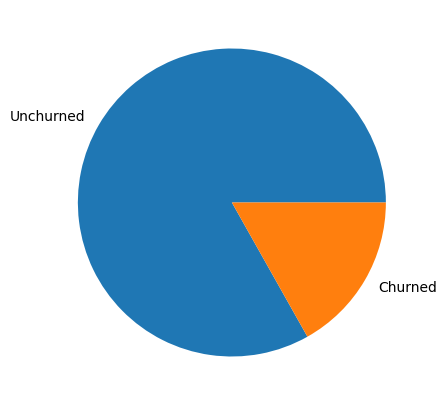

In [118]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Unchurned','Churned'])
plt.show()

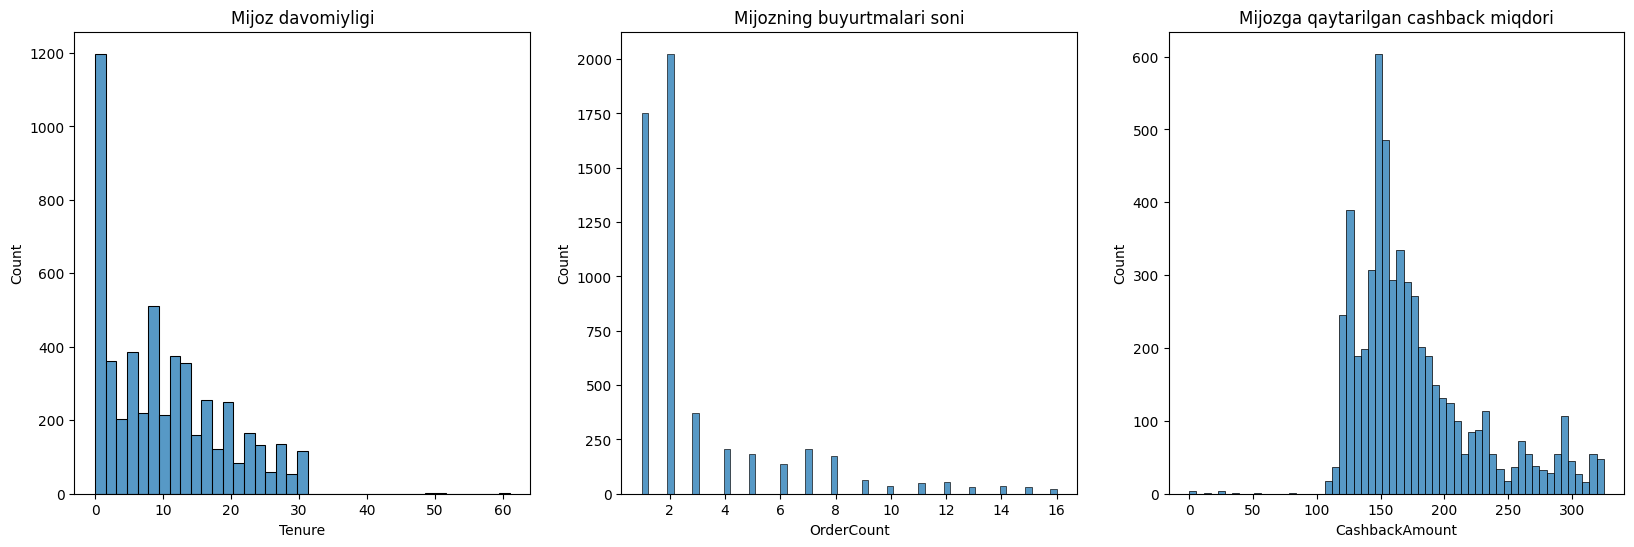

In [119]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Mijozning buyurtmalari soni")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")

plt.show()

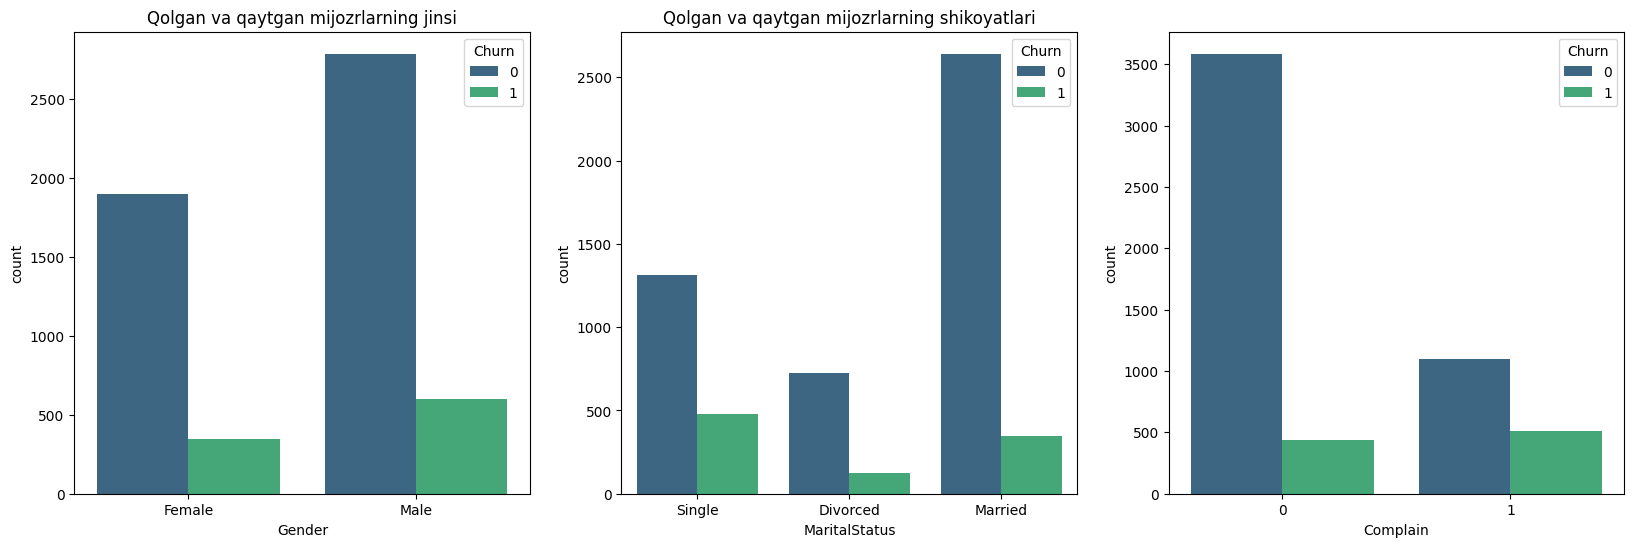

In [120]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Qolgan va qaytgan mijozrlarning shikoyatlari")

plt.show()

In [121]:
df['PreferredLoginDevice'].value_counts()

#changing values
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':0, 'Mobile Phone':1, 'Computer':2})

In [122]:
df['PreferredPaymentMode'].value_counts()

#changing values
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Debit Card':0, 'Credit Card':1,'E wallet':2,'UPI':3,'COD':4,'CC':5,'Cash on Delivery': 6})

In [123]:
df['Gender'].value_counts()

#changing values

df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [124]:
df['PreferedOrderCat'].value_counts()

#changing values
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Laptop & Accessory':0, 'Mobile Phone':1,'Fashion':2,'Mobile':3,'Grocery':4,'Others':5})

In [125]:
df['MaritalStatus'].value_counts()

#changing values
df['MaritalStatus'] = df['MaritalStatus'].replace({'Married':0, 'Single':1, 'Divorced':2})

In [126]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,0,0,3.0,3,0,2,1,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,0,1,8.0,3,1,3.0,4,3,3,1,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,0,1,30.0,0,1,2.0,4,3,3,1,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,0,3,15.0,0,1,2.0,4,0,5,1,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,0,1,12.0,5,1,NaN,3,3,5,1,3,0,11.0,1.0,1.0,3.0,129.60


In [127]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
MaritalStatus                  0.090703
CityTier                       0.084703
WarehouseToHome                0.076630
PreferredPaymentMode           0.071371
NumberOfAddress                0.043931
Gender                         0.029264
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
PreferedOrderCat               0.014740
PreferredLoginDevice           0.013281
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [128]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,0.019083,0.029952,0.148079,0.003239,0.058909,0.106280,0.004251,0.598417,0.411098,0.173571,0.033146,0.240415,0.160814,0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,0.019083,1.000000,0.349408,0.013281,0.084703,0.076630,0.071371,0.029264,0.018675,0.107939,0.014740,0.105481,0.090703,0.043931,0.250188,0.010058,0.008264,0.028697,0.160757,0.154118
Tenure,0.029952,0.349408,1.000000,0.084402,0.060688,0.018218,0.053269,0.047067,0.021226,0.023983,0.302878,0.013903,0.037815,0.237666,0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
PreferredLoginDevice,0.148079,0.013281,0.084402,1.000000,0.074136,0.029646,0.094168,0.007272,0.080180,0.102246,0.086446,0.051483,0.024921,0.055192,0.002670,0.016405,0.105342,0.119909,0.119090,0.229482
CityTier,0.003239,0.084703,0.060688,0.074136,1.000000,0.010624,0.046437,0.025176,0.009150,0.027934,0.139087,0.011554,0.027483,0.029440,0.003375,0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,0.018218,0.029646,0.010624,1.000000,0.001483,0.001062,0.060990,0.019071,0.048527,0.007722,0.022694,0.011020,0.028696,0.038795,0.003935,0.002681,0.017829,0.009200
PreferredPaymentMode,0.106280,0.071371,0.053269,0.094168,0.046437,0.001483,1.000000,0.011874,0.079422,0.047107,0.108825,0.038717,0.000548,0.044758,0.005052,0.046655,0.048779,0.054083,0.046970,0.117150
Gender,0.004251,0.029264,0.047067,0.007272,0.025176,0.001062,0.011874,1.000000,0.018761,0.021799,0.002204,0.035220,0.030161,0.031492,0.040269,0.000299,0.038586,0.031377,0.020748,0.025190
HourSpendOnApp,0.598417,0.018675,0.021226,0.080180,0.009150,0.060990,0.079422,0.018761,1.000000,0.316800,0.115103,0.031858,0.017249,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,0.023983,0.102246,0.027934,0.019071,0.047107,0.021799,0.316800,1.000000,0.096309,0.017228,0.021796,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183


In [129]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar %: 33.0%


In [130]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [131]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0%


In [132]:
data = data.dropna()
data.shape

(5059, 7)

In [133]:
data['Churn'].value_counts()/len(data)

Churn
0    0.839296
1    0.160704
Name: count, dtype: float64

In [134]:
# Matnli ustunlarni songa o'tkazamiz
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,1,0
3,1,0.0,0,3.0,134.07,1,1
4,1,0.0,0,3.0,129.60,1,1
5,1,0.0,1,7.0,139.19,1,0
8,1,13.0,1,2.0,126.83,2,1


In [135]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [137]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.71161148,  1.57764556,  0.08883471, -0.3589232 ,  0.5160404 ,
        -1.22303173],
       [-1.17836145, -0.63385593, -0.45723432, -0.88592168,  0.5160404 ,
         0.81764028],
       [-1.17836145, -0.63385593, -0.45723432, -0.97701539,  0.5160404 ,
         0.81764028],
       ...,
       [-1.06167396,  1.57764556, -0.1841998 ,  0.180914  , -0.84722247,
         0.81764028],
       [ 1.50545086, -0.63385593,  1.18097278,  0.02766464, -0.84722247,
         0.81764028],
       [-0.24486152, -0.63385593, -0.45723432, -0.17327137, -0.84722247,
         0.81764028]])

In [138]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Logistic regression

In [140]:
# Logistic regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [141]:
# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.70      0.40      0.51       163

    accuracy                           0.88      1012
   macro avg       0.80      0.69      0.72      1012
weighted avg       0.86      0.88      0.86      1012

Model aniqligi: 0.8764822134387352


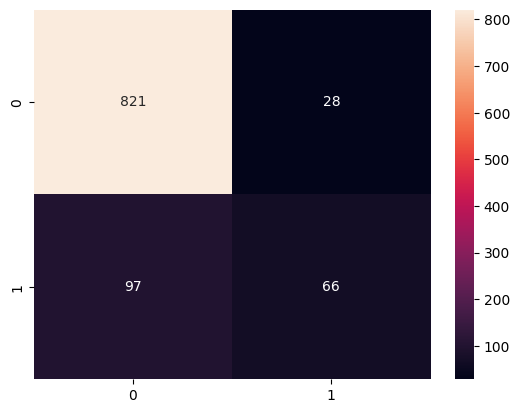

In [142]:
## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

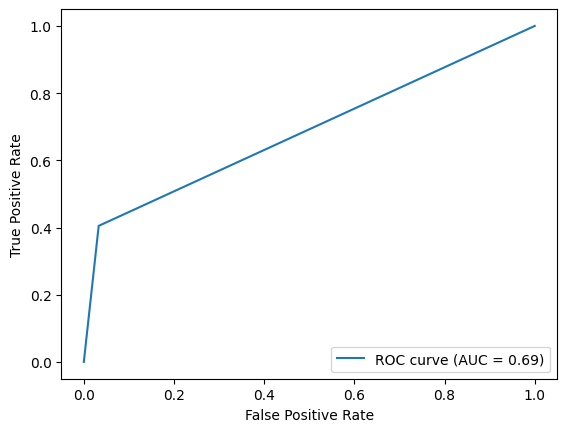

In [143]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Support Vector Machines

In [144]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [146]:
# Modelni baholaymiz

# Modelni baholaymiz
from sklearn.metrics import classification_report, accuracy_score # Import necessary functions

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.71      0.37      0.49       163

    accuracy                           0.87      1012
   macro avg       0.80      0.67      0.71      1012
weighted avg       0.86      0.87      0.86      1012

Model aniqligi: 0.8745059288537549


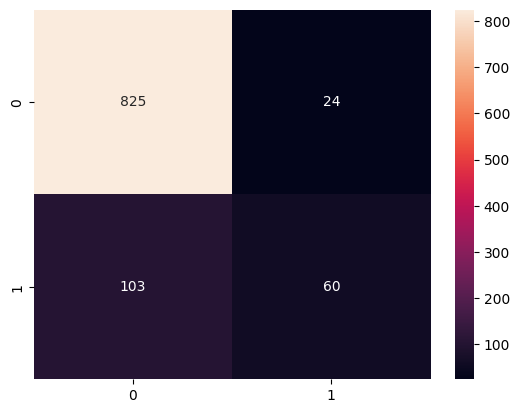

In [148]:
## confusion matrix
from sklearn.metrics import confusion_matrix # Import the missing function
import seaborn as sns # Import seaborn for heatmap
import matplotlib.pyplot as plt # Import matplotlib for plotting

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

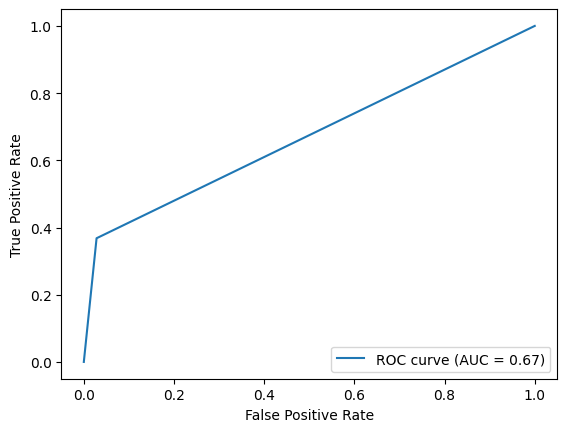

In [149]:
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

In [150]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       849
           1       0.80      0.85      0.82       163

    accuracy                           0.94      1012
   macro avg       0.89      0.91      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model aniqligi: 0.941699604743083


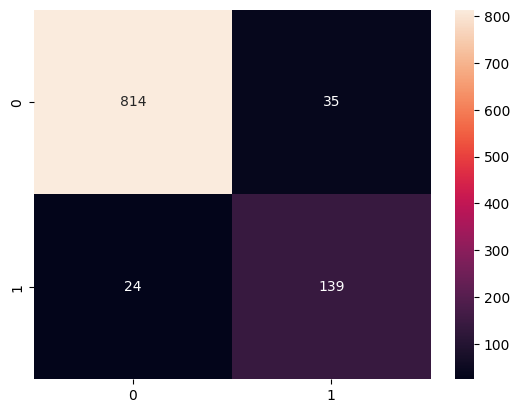

In [152]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

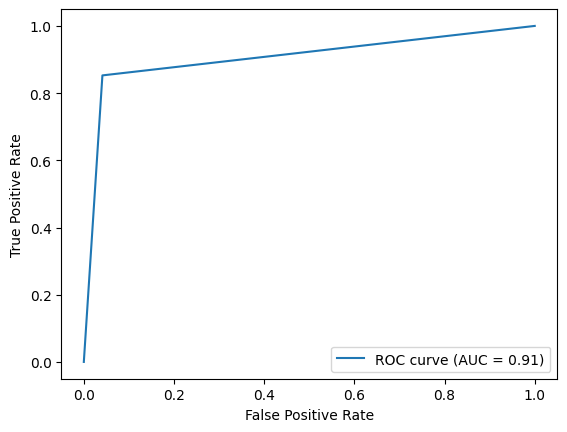

In [153]:
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

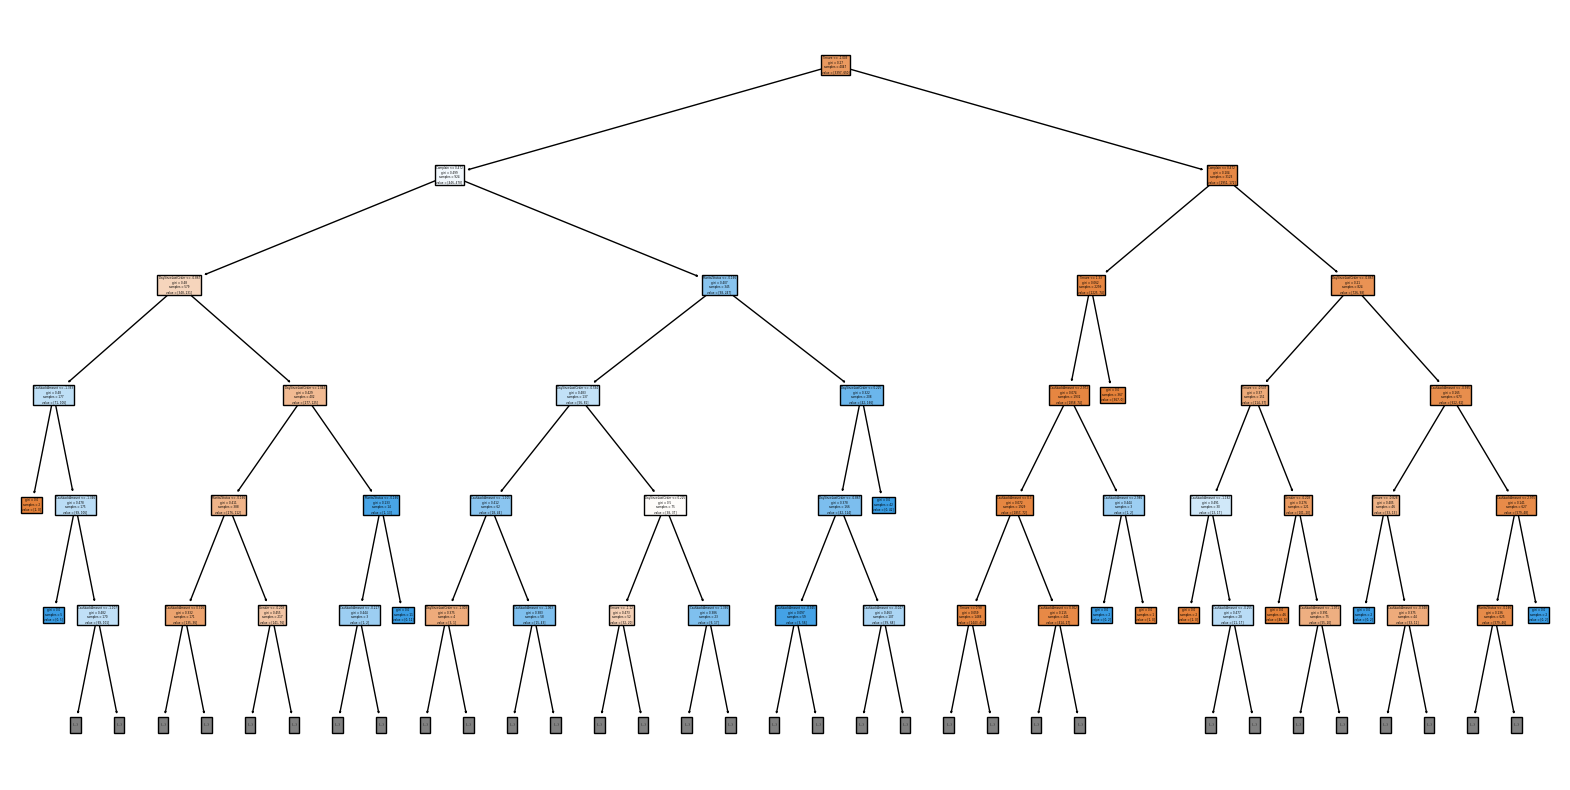

In [156]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=cols, filled=True, max_depth=5)
plt.show()

Random Forest

In [157]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9)

In [158]:
# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       849
           1       0.85      0.82      0.83       163

    accuracy                           0.95      1012
   macro avg       0.91      0.89      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Model aniqligi: 0.9476284584980237


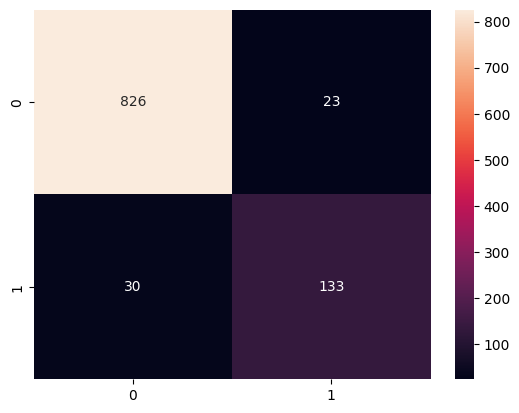

In [159]:

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

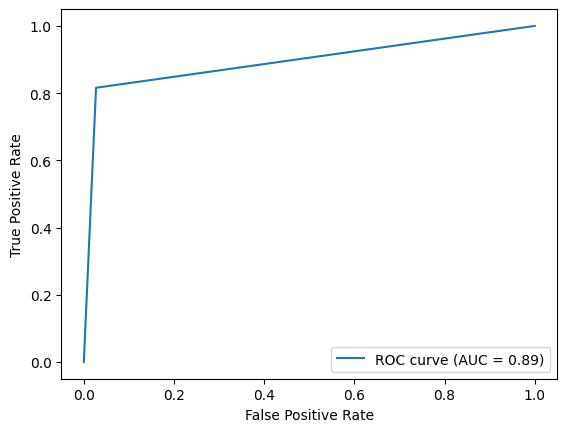

In [160]:
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

In [161]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [162]:
# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       849
           1       0.82      0.80      0.81       163

    accuracy                           0.94      1012
   macro avg       0.89      0.88      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model aniqligi: 0.9397233201581028


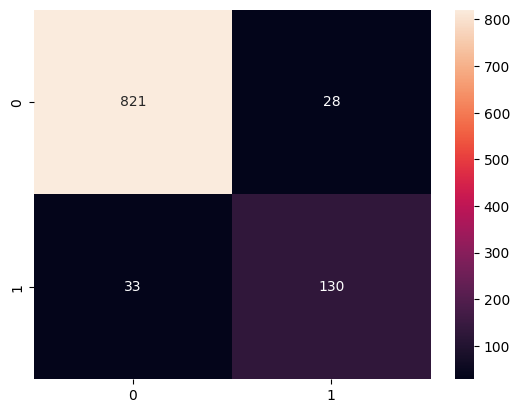

In [163]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

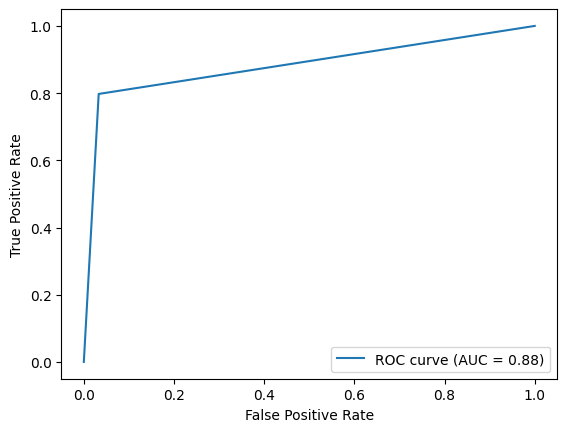

In [164]:
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()